# 14-day cumulative number of COVID-19 cases per 100 000

At the end of the page, we provide a detailed description of how the numbers are calculated.

### Compute data

In [1]:
import datetime as dt
import pandas as pd
pd.set_option("max_rows", None)
from oscovida import get_incidence_rates_countries

## Table for all countries

In [2]:
cases_incidence, deaths_incidence = get_incidence_rates_countries()

Downloaded data: last data point 12/12/20 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Downloaded data: last data point 12/12/20 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv


In [3]:
cases_incidence

,14-day-sum,population,14-day-incidence-rate
Country,,,
Afghanistan,2113,38928341,5.4
Albania,10117,2877800,351.6
Algeria,9417,43851043,21.5
Andorra,576,77265,745.5
Angola,1058,32866268,3.2
Antigua and Barbuda,7,97928,7.1
Argentina,75795,45195777,167.7
Armenia,12544,2963234,423.3
Australia,128,25459700,0.5


## Table sorted by 14-day-incidence

In [4]:
cases_incidence.sort_values(by=['14-day-incidence-rate'], ascending=False)

,14-day-sum,population,14-day-incidence-rate
Country,,,
Turkey,1202181,84339067,1425.4
Georgia,54638,3989175,1369.7
Luxembourg,7346,625976,1173.5
Croatia,45911,4105268,1118.3
Lithuania,30059,2722291,1104.2
Serbia,92223,8737370,1055.5
San Marino,346,33938,1019.5
Slovenia,20100,2078932,966.8
Montenegro,6067,628062,966.0


## Tutorial: Detailed calculation for one country

In [5]:
from oscovida import fetch_cases, get_population
import datetime

In [6]:
period = 14 # Days we compute the incidence rate over

In [7]:
cases = fetch_cases() # Get a DataFrame where each row is the country, and columns cumulative case numbers
cases = cases.groupby(cases.index).sum() # Merge the rows for different regions as we want the numbers for an entire country

In [8]:
cases_germany = cases.loc['Germany'][2:] # First 2 entries are lat/lon so we only take the subsequent ones
cases_germany.tail()

12/8/20     1229269.0
12/9/20     1254358.0
12/10/20    1287092.0
12/11/20    1314309.0
12/12/20    1336101.0
Name: Germany, dtype: float64

In [9]:
yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
x_days_ago = yesterday - datetime.timedelta(days=period)

In [10]:
period_mask = (
    (yesterday > pd.to_datetime(cases_germany.index)) &
    (pd.to_datetime(cases_germany.index) > x_days_ago)
) # Mask for dates between today and x days ago

In [11]:
cases_in_period_per_day_germany = cases_germany[period_mask].diff() # Apply the period mask and get the diff to get the daily new cases
cases_in_period_per_day_germany

11/29/20        NaN
11/30/20    14221.0
12/1/20     24766.0
12/2/20     23275.0
12/3/20     23591.0
12/4/20     15970.0
12/5/20     26126.0
12/6/20     10910.0
12/7/20      5456.0
12/8/20     29263.0
12/9/20     25089.0
12/10/20    32734.0
12/11/20    27217.0
12/12/20    21792.0
Name: Germany, dtype: float64

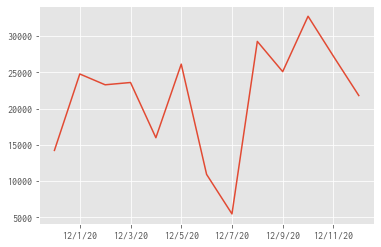

In [12]:
cases_in_period_per_day_germany.plot() # We can easily look at new cases per day

In [13]:
population = get_population().population

In [14]:
population_germany = population.loc['Germany'] # Get the population of Germany
population_germany

83783945.0

In [15]:
incidence_rate_germany = cases_in_period_per_day_germany.sum() / population_germany * 100_000
incidence_rate_germany # By convention this is total cases over period / population * 100_000

334.68225923236247